# MNIST Digit Classification 

## Packeges

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-12-06 11:02:28.402506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 11:02:29.799877: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-06 11:02:43.233088: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2023-12-06 11:02:43.233596: W tensorflow/compiler/xla/stream_executor/

## Load Dataset

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train[0].ptp()

255

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Validation dataset

In [9]:
X_valid = X_train[:5000]
y_valid = y_train[:5000]

In [10]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

## Normelization

In [11]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## Display the images

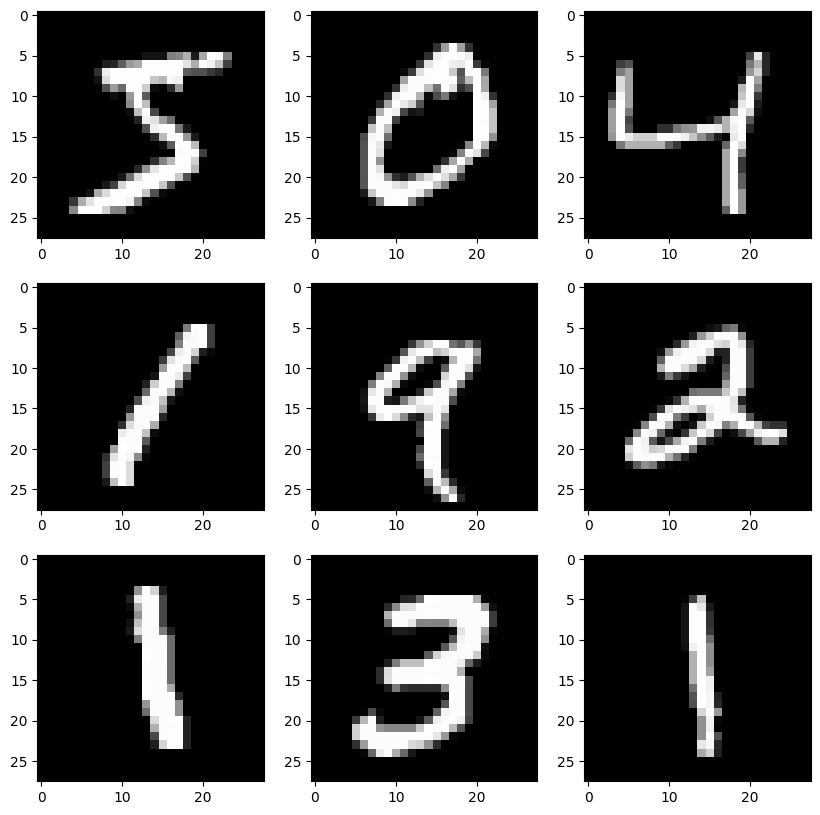

In [12]:
fig, aXes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        aXes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1

In [13]:
y_train[0]

5

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

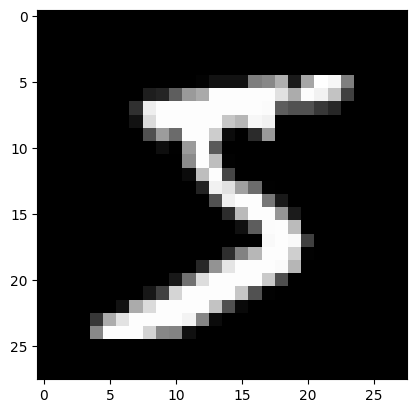

In [15]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

## Model prepration

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


2023-12-06 11:03:01.304845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 11:03:01.309360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 11:03:01.309721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 11:03:01.344088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

In [17]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 300)               4

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# sparse_categorical_crossentropy

## Training

In [20]:
epochs = 20
history = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), batch_size=32, epochs=epochs )

Epoch 1/20


2023-12-06 11:03:11.916606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-12-06 11:03:19.559950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-06 11:03:19.669110: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fca85696300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-06 11:03:19.669170: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-06 11:03:20.691774: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 21s 2ms/step - loss: 0.5040 - accuracy: 0.8504 - val_loss: 0.1703 - val_accuracy: 0.9470
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1290 - accuracy: 0.9610 - val_loss: 0.0943 - val_accuracy: 0.9714
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0884 - accuracy: 0.9732 - val_loss: 0.0676 - val_accuracy: 0.9826
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0693 - accuracy: 0.9789 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0457 - val_accuracy: 0.9874
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0342 - val_accuracy: 0.9904
Ep

## Evaluation

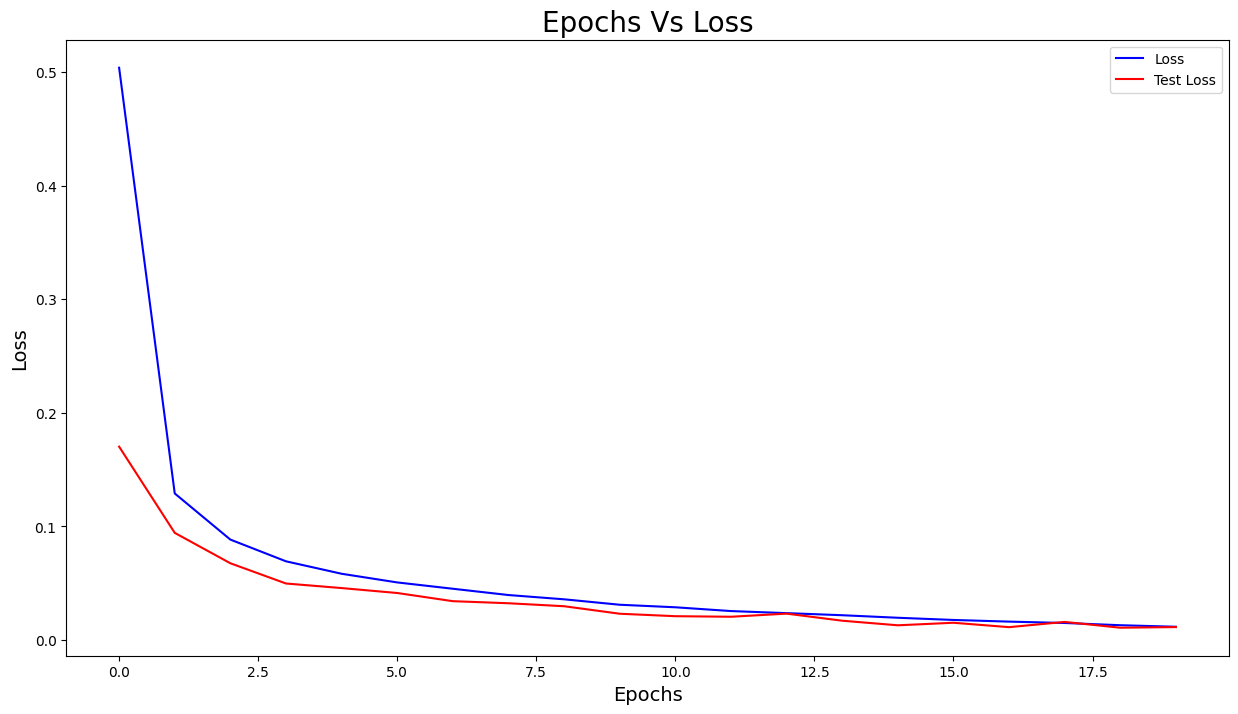

In [21]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.title('Epochs Vs Loss', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

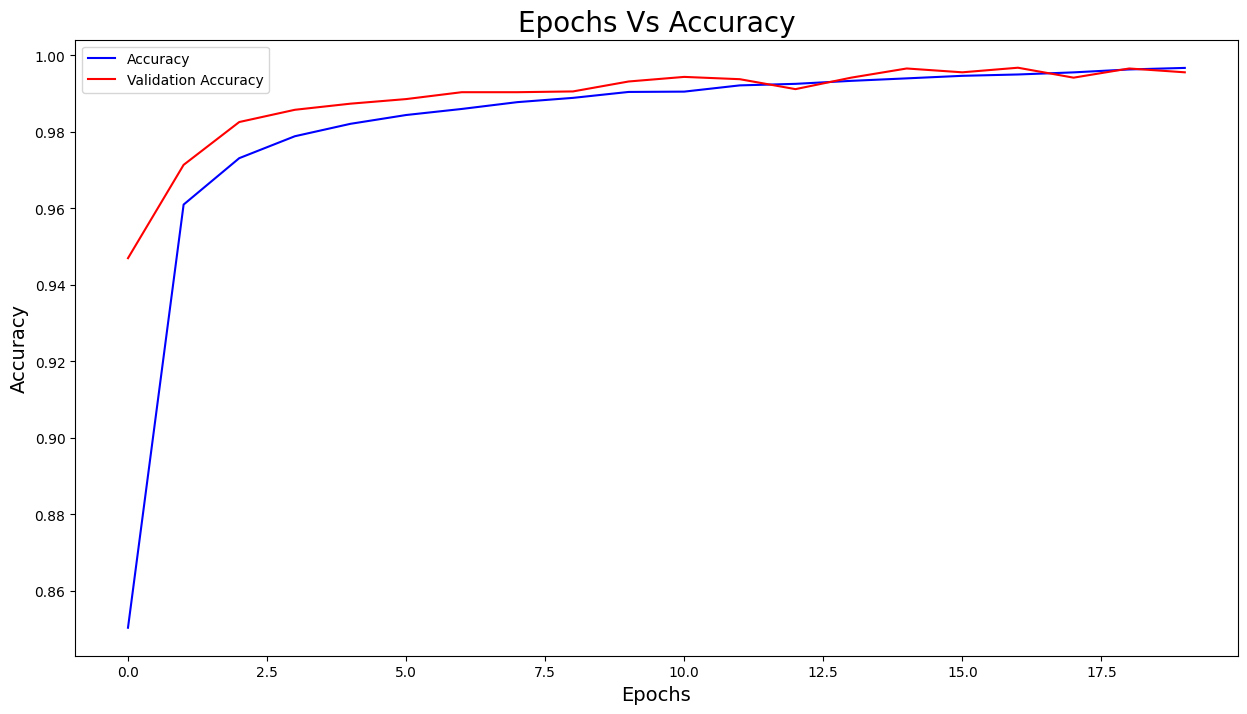

In [22]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.title('Epochs Vs Accuracy', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9906


[0.03242524340748787, 0.9905999898910522]

In [24]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 0s 626us/step


array([7, 2, 1, ..., 4, 5, 6])

In [54]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [55]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1134,    0,    0,    0,    1,    0,    0,    0,    0],
       [   1,    2, 1022,    0,    2,    0,    0,    4,    1,    0],
       [   1,    0,    1, 1002,    0,    3,    0,    1,    1,    1],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   2,    0,    0,    7,    0,  879,    2,    1,    1,    0],
       [   2,    3,    1,    0,    3,    4,  945,    0,    0,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1024,    2,    0],
       [   5,    0,    4,    1,    0,    1,    0,    2,  959,    2],
       [   0,    2,    0,    2,    8,    1,    1,    7,    3,  985]],
      dtype=int32)>

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import precision_score, recall_score

In [51]:
precision_score(y_test, y_classes, average='micro')


0.9906

In [52]:
recall_score(y_test, y_classes, average='micro')

0.9906

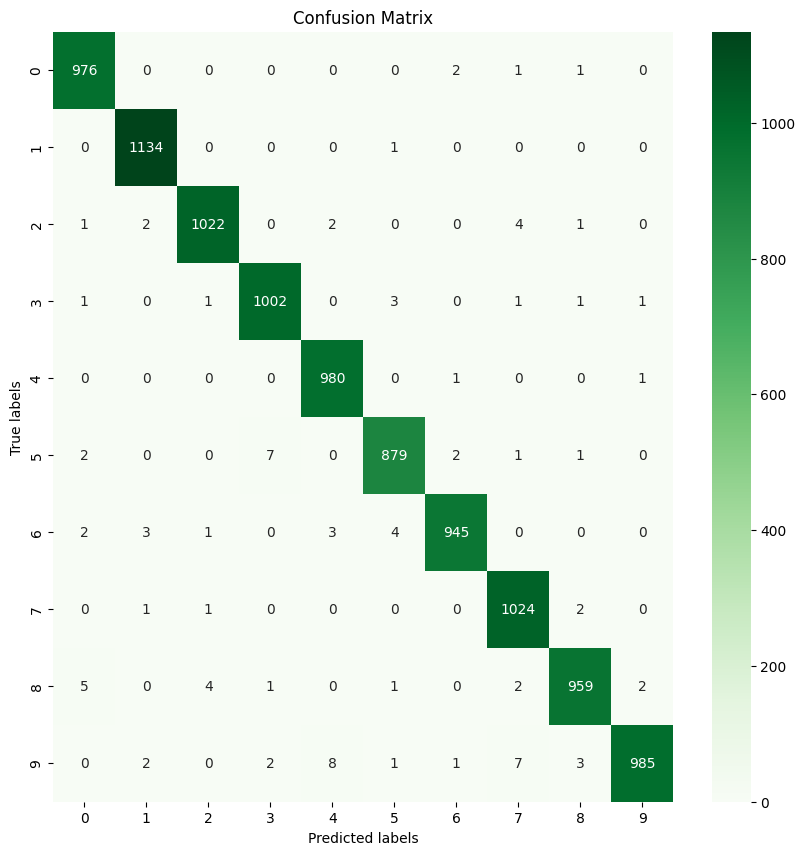

In [56]:
import seaborn as sb   

# ax = plt.figure(figsize=(8, 6))
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

## Save model

In [57]:
model.save('mnist_conv_0.h5')

##  Inference

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [59]:
img = cv2.imread('/home/appy1/Downloads/2.jpeg')

In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (21,21), 0)
thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]

In [61]:
img.shape

(225, 225, 3)

In [62]:
thresh = cv2.resize(thresh, (28,28))

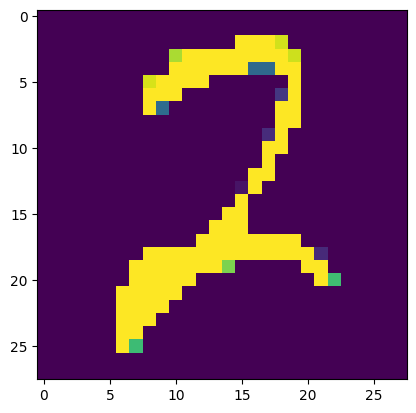

In [63]:
plt.imshow(thresh)

In [64]:
thresh= thresh/255

In [65]:
thresh.shape

(28, 28)

In [66]:
thresh

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.    

In [67]:
im = np.expand_dims(thresh, -1)[None]
im.shape

(1, 28, 28, 1)

In [68]:
cl = model.predict(im)

1/1 [==============================] - 0s 10ms/step


In [69]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [70]:
class_names[np.argmax(cl)]

'2'